#   <font color = 'Brown'> <h1 align = 'center'>River Water Quality EDA </h1> </font> 

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [250]:
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df_stations = pd.read_csv('PB_stations.csv',sep=';', encoding='latin-1')

In [215]:
df.head(20)

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.500,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.750,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.800,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.130,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.000,0.065,281.60,0.134,1462.00
5,1,07.06.2001,0.020,4.02,34.0,10.61,11.800,0.016,287.00,0.208,1183.00
6,1,10.09.2001,0.863,3.91,147.0,10.96,20.500,0.284,595.20,0.674,4023.00
7,1,06.11.2001,0.060,2.97,71.2,13.47,25.800,0.095,314.00,0.390,1907.00
8,1,12.03.2002,0.168,4.15,27.0,17.82,3.945,0.058,153.60,0.110,473.00
9,1,06.06.2002,0.001,7.11,74.4,19.28,2.260,0.017,409.60,0.181,1782.00


In [216]:
df_stations.head(10)

,id,length,name_station
0,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé..."
1,2,136.0,"ð. Ï³âäåííèé Áóã, 136 êì, ñ. Îëåêñàíäð³âêà, Îë..."
2,3,153.0,"ð. Ï³âäåííèé Áóã, 153 êì, ñ. Îëåêñ³³âêà, ïèòíè..."
3,4,206.0,"ð. Ï³âäåííèé Áóã, 206 êì, ì. Ïåðâîìàéñüê, Ïåðâ..."
4,5,237.0,"ð. Ï³âäåííèé Áóã, 237 êì, ïèòíèé âîäîçàá³ð ñìò..."
5,6,316.0,"ð. Ï³âäåííèé Áóã, 316 êì, ì.Ãàéâîðîí, Ãàéâîðîí..."
6,7,327.0,"ð. Ï³âäåííèé Áóã, 327 êì, ñ. Ñòàâêè, êîðäîí Â³..."
7,8,372.0,"ð. Ï³âäåííèé Áóã, 372 êì, ñ. Ãëèáî÷îê, Ãëèáî÷å..."
8,9,400.0,"ð. Ï³âäåííèé Áóã, 400 êì, ì. Ëàäèæèí, Ëàäèæèíñ..."
9,10,413.0,"ð. Ï³âäåííèé Áóã, 413 êì, ñ. Ìàíüê³âêà, âèùå ñ..."


In [217]:
df_stations.name_station.unique()

array(['ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé ëèìàí, òåõ. â/ç Ìèêîëà¿âñüêî¿ ÒÅÖ (ë³âà ÷àñòèíà ìîðñüêîãî ïîðòó)',
       'ð. Ï³âäåííèé Áóã, 136 êì, ñ. Îëåêñàíäð³âêà, Îëåêñàíäð³âñüêå âäñõ.',
       'ð. Ï³âäåííèé Áóã, 153 êì, ñ. Îëåêñ³³âêà, ïèòíèé â/ç ì. Ï³âäåííî-Óêðà¿íñüê',
       'ð. Ï³âäåííèé Áóã, 206 êì, ì. Ïåðâîìàéñüê, Ïåðâîìàéñüêå âäñõ.',
       'ð. Ï³âäåííèé Áóã, 237 êì, ïèòíèé âîäîçàá³ð ñìò Ïîáóçüêå',
       'ð. Ï³âäåííèé Áóã, 316 êì, ì.Ãàéâîðîí, Ãàéâîðîíñüêå âäñõ.',
       'ð. Ï³âäåííèé Áóã, 327 êì, ñ. Ñòàâêè, êîðäîí Â³ííèöüêî¿ òà Ê³ðîâîãðàäñüêî¿ îáë.',
       'ð. Ï³âäåííèé Áóã, 372 êì, ñ. Ãëèáî÷îê, Ãëèáî÷åêñüêå âäñõ.',
       'ð. Ï³âäåííèé Áóã, 400 êì, ì. Ëàäèæèí, Ëàäèæèíñüêå âäñõ.',
       'ð. Ï³âäåííèé Áóã, 413 êì, ñ. Ìàíüê³âêà, âèùå ñåëà, ïèòíèé â/ç ì.Ëàäèæèí',
       'ð. Ï³âäåííèé Áóã, 50 êì, ñ. Êîâàë³âêà, Ï³âäåííî-Áóçüêà ÇÑ',
       "ð. Ï³âäåííèé Áóã, 537 êì, ñìò. Ñóòèñêè, Ñóòèñüêå âäñõ., í/á'ºô",
       'ð. Ï³âäåííèé Áóã, 569,5 êì, 500 ì íèæ÷å ñêèäó ÂÎÊÂÏ ÂÊÃ "Â³í

### Checking for Null values

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [219]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            22 non-null     int64  
 1   length        22 non-null     float64
 2   name_station  22 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 656.0+ bytes


In [220]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

<AxesSubplot:>

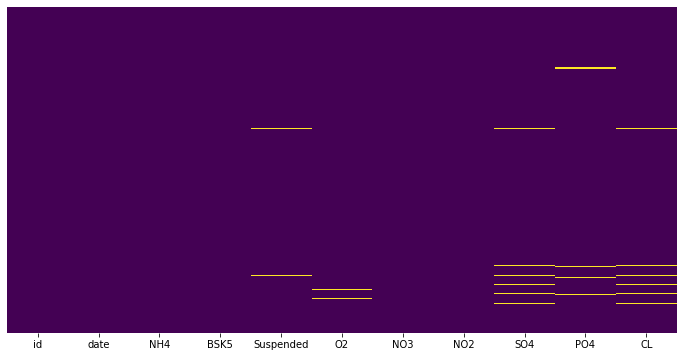

In [260]:
matplotlib.rcParams['figure.figsize'] = (12, 6) #This is used to set the parameters of the diagram that will be printed using seaborn
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap="viridis")

### Handling missing values

In [221]:
df.NH4 = df.NH4.fillna(df.NH4.mean())
df.BSK5 = df.BSK5.fillna(df.BSK5.mean())
df.Suspended = df.Suspended.fillna(df.Suspended.mean())
df.O2 = df.O2.fillna(df.O2.mean())
df.NO3 = df.NO3.fillna(df.NO3.mean())
df.NO2 = df.NO2.fillna(df.NO2.mean())
df.SO4 = df.SO4.fillna(df.SO4.mean())
df.PO4 = df.PO4.fillna(df.PO4.mean())
df.CL = df.CL.fillna(df.CL.mean())

In [222]:
df.isnull().sum()

id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
dtype: int64

In [223]:
df.id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [224]:
df_stations.id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [251]:
final_df = df_stations.merge(df, on= 'id', how='left')

In [244]:
final_df.head(10)

,id,length,name_station,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",17.02.2000,0.330,2.77,12.0,12.30,9.500,0.057,154.0,0.454,289.5
1,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",11.05.2000,0.044,3.00,51.6,14.61,17.750,0.034,352.0,0.090,1792.0
2,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",11.09.2000,0.032,2.10,24.5,9.87,13.800,0.173,416.0,0.200,2509.0
3,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",13.12.2000,0.170,2.23,35.6,12.40,17.130,0.099,275.2,0.377,1264.0
4,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",02.03.2001,0.000,3.03,48.8,14.69,10.000,0.065,281.6,0.134,1462.0
5,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",07.06.2001,0.020,4.02,34.0,10.61,11.800,0.016,287.0,0.208,1183.0
6,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",10.09.2001,0.863,3.91,147.0,10.96,20.500,0.284,595.2,0.674,4023.0
7,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",06.11.2001,0.060,2.97,71.2,13.47,25.800,0.095,314.0,0.390,1907.0
8,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",12.03.2002,0.168,4.15,27.0,17.82,3.945,0.058,153.6,0.110,473.0
9,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",06.06.2002,0.001,7.11,74.4,19.28,2.260,0.017,409.6,0.181,1782.0


In [227]:
unique_names = final_df.name_station.unique()
# a = final_df.name_station.iloc[0]
# final_df.name_station = final_df.name_station.replace(a, 'Station'+)

In [228]:
final_df.head()

,id,length,name_station,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,0.5,"ð. Ï³âäåííèé Áóã, 0,5 êì, ì. Ìèêîëà¿â, Áóçüêèé...",02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [229]:
unique_names = final_df.name_station.unique()
for i in range(len(unique_names)):
    c  = str(i+1)
    a = unique_names[i]
    final_df.name_station = final_df.name_station.replace(a, 'Station: '+c)
    

In [230]:
final_df

,id,length,name_station,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,0.5,Station: 1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,0.5,Station: 1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,0.5,Station: 1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,0.5,Station: 1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,0.5,Station: 1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,22,97.0,Station: 22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,97.0,Station: 22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,97.0,Station: 22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,97.0,Station: 22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [231]:
final_df.name_station.value_counts()

Station: 3     262
Station: 14    259
Station: 15    258
Station: 22    256
Station: 16    253
Station: 10    252
Station: 13    149
Station: 12    148
Station: 4      91
Station: 19     84
Station: 20     82
Station: 17     81
Station: 18     80
Station: 21     80
Station: 2      77
Station: 9      76
Station: 1      76
Station: 7      71
Station: 6      71
Station: 8      70
Station: 11     59
Station: 5      26
Name: name_station, dtype: int64

# Data Visulization

([<matplotlib.patches.Wedge at 0x2a3fb34f760>,
 [Text(1.009229717434206, 0.43755614205227744, 'Station: 3'),
  Text(0.37532539114491853, 1.0339878387882104, 'Station: 14'),
  Text(-0.487415901871852, 0.9861164934237989, 'Station: 15'),
  Text(-1.0478475073332156, 0.3346873188149905, 'Station: 22'),
  Text(-0.9728325538082525, -0.5134168114221755, 'Station: 16'),
  Text(-0.32157251385341906, -1.0519463476499136, 'Station: 10'),
  Text(0.3558864878324094, -1.040838511863542, 'Station: 13'),
  Text(0.7838661125725811, -0.7717213989260308, 'Station: 12'),
  Text(1.0112682101630712, -0.4328239909172994, 'Station: 4'),
  Text(1.090551925503525, -0.14386277413060838, 'Station: 19')],
 [Text(0.5504889367822942, 0.23866698657396948, '13.02%'),
  Text(0.204722940624501, 0.563993366611751, '12.87%'),
  Text(-0.26586321920282835, 0.5378817236857084, '12.82%'),
  Text(-0.5715531858181175, 0.18255671935363113, '12.72%'),
  Text(-0.530635938440865, -0.2800455335030048, '12.57%'),
  Text(-0.1754031893

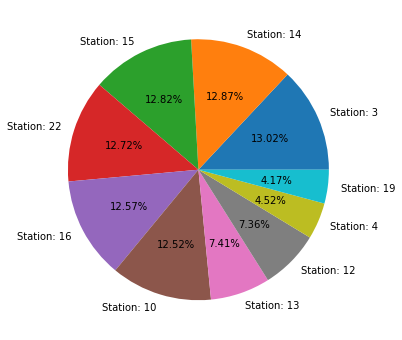

In [232]:
stationNames = final_df.name_station.value_counts().index
stationCount = final_df.name_station.value_counts().values
plt.pie(x = stationCount[:10], labels = stationNames[:10], autopct='%1.2f%%')

<AxesSubplot:xlabel='name_station', ylabel='count'>

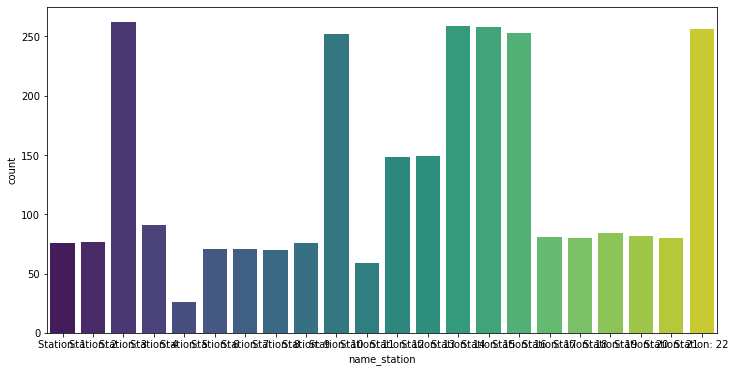

In [233]:
sns.countplot(x = 'name_station', data = final_df, palette = 'viridis')

### Stations with top NH4 values

In [234]:
stationNH4 = []
for i in final_df.name_station.unique():
    a = final_df.NH4[final_df.name_station == i]
    b = a.mean()
    stationNH4.append(b)
stationNH4

[0.14272368421052625,
 0.07129870129870129,
 0.0638473282442748,
 0.07356043956043955,
 0.13953846153846156,
 0.2726056338028168,
 0.32966197183098594,
 0.28232857142857143,
 0.317578947368421,
 0.3703134920634917,
 0.05003389830508474,
 0.5595455005390276,
 1.0450134228187924,
 0.4243243243243244,
 0.43154057426183007,
 0.46447430830039527,
 1.042456790123457,
 5.6545875,
 8.031749999999999,
 0.8206951219512193,
 0.9085749999999996,
 0.06130859374999999]

<AxesSubplot:xlabel='StationName', ylabel='StationNH4Value'>

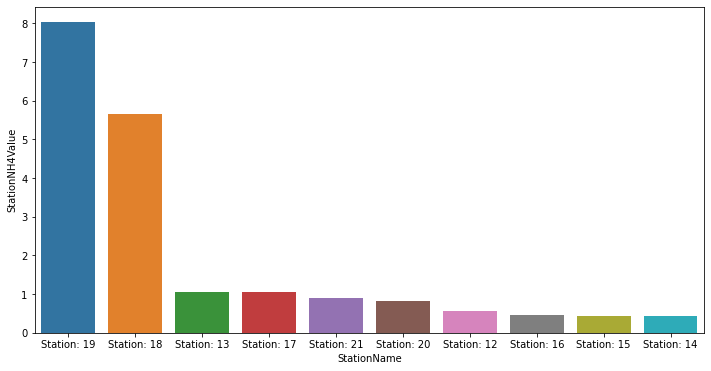

In [235]:
NH4Bar = pd.DataFrame({'StationName':final_df.name_station.unique(), 'StationNH4Value':stationNH4})
sns.barplot(x = sortedNH4.StationName[:10], y = sortedNH4.StationNH4Value[:10])

### Stations with top BSK5 values

In [236]:
stationBSK5 = []
for i in final_df.name_station.unique():
    a = final_df.BSK5[final_df.name_station == i]
    b = a.mean()
    stationBSK5.append(b)
stationBSK5

[3.7181578947368434,
 2.2285714285714286,
 2.01320610687023,
 2.36010989010989,
 2.61076923076923,
 3.6635211267605627,
 4.460563380281692,
 4.725428571428572,
 5.205526315789474,
 4.515476190476191,
 1.9132203389830507,
 5.240202702702703,
 6.542080536912751,
 5.112857142857146,
 5.172698379140241,
 5.145968379446642,
 4.9528395061728405,
 6.018875,
 8.36845238095238,
 4.517073170731706,
 4.873875000000001,
 1.848945312500001]

<AxesSubplot:xlabel='StationName', ylabel='StationBSK5Value'>

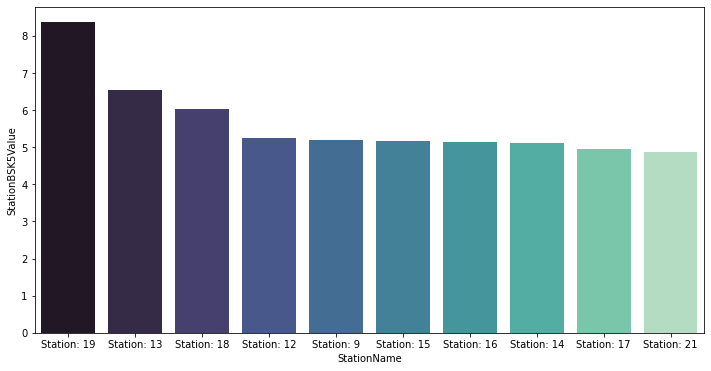

In [237]:
BSK5Bar = pd.DataFrame({'StationName':final_df.name_station.unique(), 'StationBSK5Value':stationBSK5})
sortedBSK5 = BSK5Bar.sort_values(by = 'StationBSK5Value', ascending = False)
sns.barplot(x = sortedBSK5.StationName[:10], y = sortedBSK5.StationBSK5Value[:10], palette='mako')

In [238]:
final_df.head(10)

,id,length,name_station,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,0.5,Station: 1,17.02.2000,0.330,2.77,12.0,12.30,9.500,0.057,154.0,0.454,289.5
1,1,0.5,Station: 1,11.05.2000,0.044,3.00,51.6,14.61,17.750,0.034,352.0,0.090,1792.0
2,1,0.5,Station: 1,11.09.2000,0.032,2.10,24.5,9.87,13.800,0.173,416.0,0.200,2509.0
3,1,0.5,Station: 1,13.12.2000,0.170,2.23,35.6,12.40,17.130,0.099,275.2,0.377,1264.0
4,1,0.5,Station: 1,02.03.2001,0.000,3.03,48.8,14.69,10.000,0.065,281.6,0.134,1462.0
5,1,0.5,Station: 1,07.06.2001,0.020,4.02,34.0,10.61,11.800,0.016,287.0,0.208,1183.0
6,1,0.5,Station: 1,10.09.2001,0.863,3.91,147.0,10.96,20.500,0.284,595.2,0.674,4023.0
7,1,0.5,Station: 1,06.11.2001,0.060,2.97,71.2,13.47,25.800,0.095,314.0,0.390,1907.0
8,1,0.5,Station: 1,12.03.2002,0.168,4.15,27.0,17.82,3.945,0.058,153.6,0.110,473.0
9,1,0.5,Station: 1,06.06.2002,0.001,7.11,74.4,19.28,2.260,0.017,409.6,0.181,1782.0


### Stations with top Suspended values

In [239]:
stationSuspended = []
for i in final_df.name_station.unique():
    a = final_df.Suspended[final_df.name_station == i]
    b = a.mean()
    stationSuspended.append(b)
stationSuspended

[46.79473684210527,
 8.433766233766233,
 9.183167938931303,
 10.130219780219777,
 13.015384615384617,
 7.808591549295776,
 9.580281690140845,
 9.542857142857143,
 9.081578947368422,
 9.64628496108461,
 9.754745762711865,
 11.296621621621622,
 10.699060402684564,
 10.98248575364217,
 11.359673315077451,
 10.856615850566488,
 22.76918284189286,
 31.62242262741652,
 24.988951251150723,
 19.38343786703245,
 17.248023813708258,
 8.970468750000013]

<AxesSubplot:xlabel='StationName', ylabel='StationSuspendedValue'>

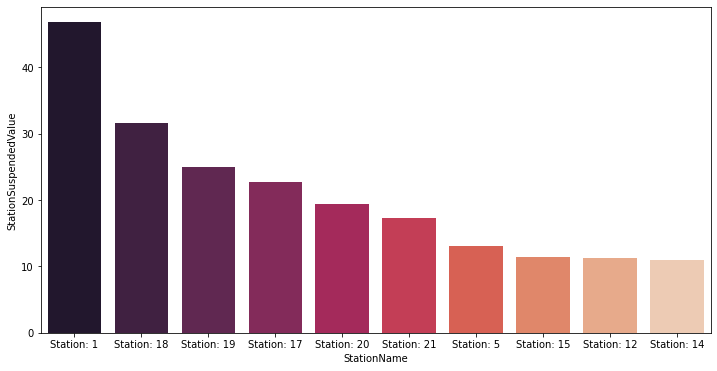

In [240]:
suspendedBar = pd.DataFrame({'StationName':final_df.name_station.unique(), 'StationSuspendedValue':stationSuspended})
sortedsuspended = suspendedBar.sort_values(by = 'StationSuspendedValue', ascending = False)
sns.barplot(x = sortedsuspended.StationName[:10], y = sortedsuspended.StationSuspendedValue[:10], palette='rocket')

We can plot the bar diagrams in the same way for other variables as well.

### Time Series Analysis

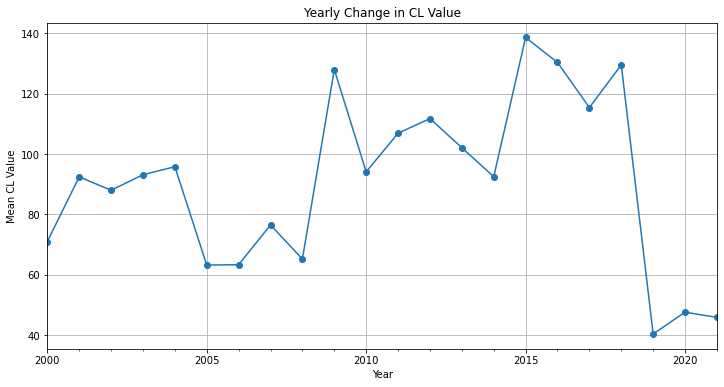

In [254]:
final_df['date'] = pd.to_datetime(final_df['date'], format='%d.%m.%Y')
final_df.set_index('date', inplace=True)

# Resampling on a yearly frequency and calculating the mean for each year
yearly_mean = final_df['CL'].resample('Y').mean()

plt.figure(figsize=(12, 6))
yearly_mean.plot(marker='o')
plt.title('Yearly Change in CL Value')
plt.xlabel('Year')
plt.ylabel('Mean CL Value')
plt.grid(True)
plt.show()

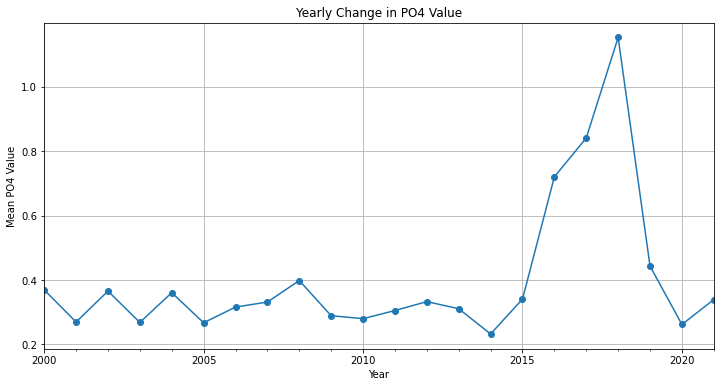

In [256]:
final_df['date'] = pd.to_datetime(final_df['date'], format='%d.%m.%Y')
final_df.set_index('date', inplace=True)

# Resampling on a yearly frequency and calculating the mean for each year
yearly_mean = final_df['PO4'].resample('Y').mean()

plt.figure(figsize=(12, 6))
yearly_mean.plot(marker='o')
plt.title('Yearly Change in PO4 Value')
plt.xlabel('Year')
plt.ylabel('Mean PO4 Value')
plt.grid(True)
plt.show()

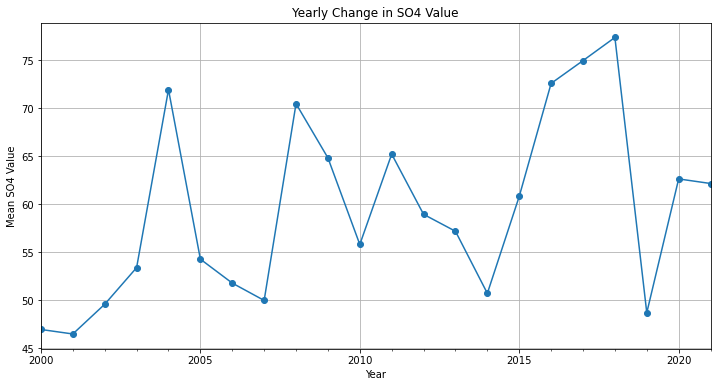

In [258]:
final_df['date'] = pd.to_datetime(final_df['date'], format='%d.%m.%Y')
final_df.set_index('date', inplace=True)

# Resampling on a yearly frequency and calculating the mean for each year
yearly_mean = final_df['SO4'].resample('Y').mean()

plt.figure(figsize=(12, 6))
yearly_mean.plot(marker='o')
plt.title('Yearly Change in SO4 Value')
plt.xlabel('Year')
plt.ylabel('Mean SO4 Value')
plt.grid(True)
plt.show()